# Medical Imaging 

### 29 March 2022

### Lab 1

Consider the 3D CT image stored in ct.mat, where the image intensity of each pixel (i,j,k) corresponds to the CT index, defined as $ CT_{ijk} = \frac{\mu_{ijk} - \mu_{H_{2}O}}{\mu_{H_{2}O}} \times 1000 $ where $ \mu_{H_{2}O} = 0.206 cm^{-1}$ with $ FOV_{xyz} = 200 \times 200 \times 260 mm^{3} $

In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from roipoly import RoiPoly
from scipy.ndimage import gaussian_filter

#### 1. Display a histogram of the CT image intensities (i.e. CT indexes), and then a histogram of the corresponding attenuation coefficients, by converting CT indexes to attenuation

In [2]:
ct = loadmat("ct.mat")
images = np.array(ct["ct"])
[rows, cols, slices] = images.shape
print(rows, cols, slices)

512 512 256


In [3]:
cor_slice = images[rows//2, :, :]
sag_slice = images[:, cols//2, :]
ax_slice = images[:,:,slices//2]

In [4]:
histogram, bin_edges = np.histogram(images, bins=512)
cor_histogram, cor_bin_edges = np.histogram(cor_slice, bins=rows)
sag_histogram, sag_bin_edges = np.histogram(sag_slice, bins=cols)
ax_histogram, ax_bin_edges = np.histogram(ax_slice, bins=slices)

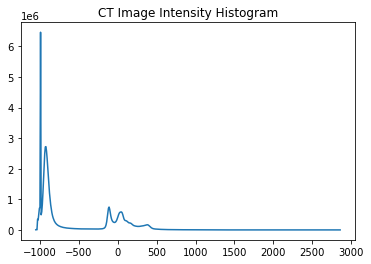

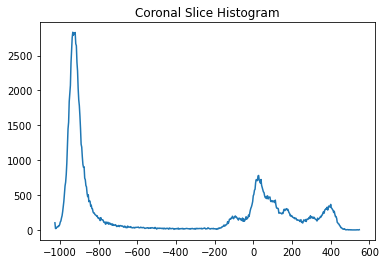

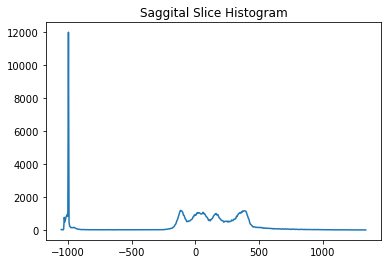

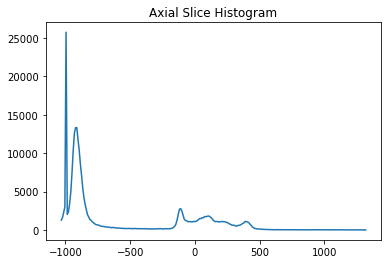

In [7]:
# %matplotlib qt

plt.figure("CT Image Intensity Histogram")
plt.title("CT Image Intensity Histogram")
plt.plot(bin_edges[0:-1], histogram)

plt.figure("Coronal Histogram")
plt.title("Coronal Slice Histogram")
plt.plot(cor_bin_edges[0:-1], cor_histogram)

plt.figure("Saggital Histogram")
plt.title("Saggital Slice Histogram")
plt.plot(sag_bin_edges[0:-1], sag_histogram)

plt.figure("Axial Histogram")
plt.title("Axial Slice Histogram")
plt.plot(ax_bin_edges[0:-1], ax_histogram)

In [8]:
mu_water = 0.206
mu_ijk = (images*(mu_water / 1000)) + mu_water

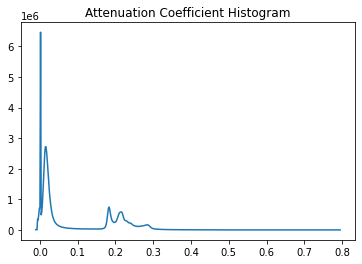

In [9]:
att_coeffs_histogram, att_coeffs_bin_edges = np.histogram(mu_ijk, bins=512)

plt.figure("Attenuation Coefficient Histogram")
plt.title("Attenuation Coefficient Histogram")
plt.plot(att_coeffs_bin_edges[0:-1], att_coeffs_histogram)


#### 2. Display 15 representative slices of the image of attenuation coefficients for each orientation - axial (x,y), sagittal (x,z) and coronal (y,z):
<strong> a. applying rotations when appropriate </strong><br>
<strong> b. using an adequate intensity scale for tissue visualization </strong><br>
<strong> c. using an intensity scale that is matched across slices.</strong><br>

In [10]:
row_skip = rows // 15
cols_skip = cols // 15
slices_skip = slices // 15

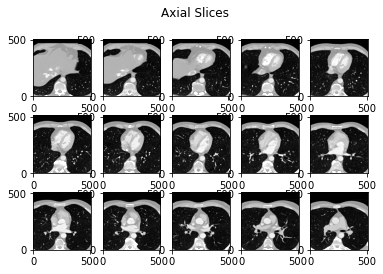

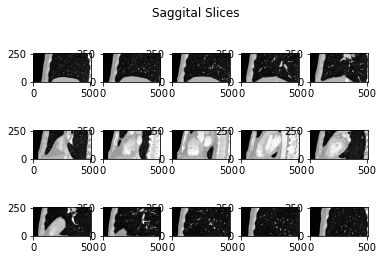

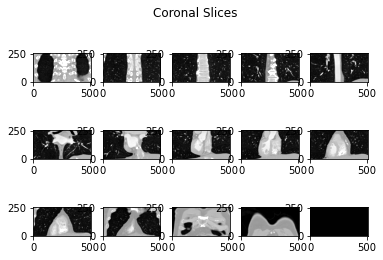

In [11]:
# %matplotlib inline

for i in range(15):
    plt.figure("Axial Slices")
    ax_slice = images[:, :, i*slices_skip]
    plt.suptitle("Axial Slices")
    plt.subplot(3, 5, i+1)
    plt.imshow(ax_slice, cmap="gray", origin="lower", vmin=-1000, vmax=460)

    plt.figure("Saggital Slices")
    plt.suptitle("Saggital Slices")
    sag_slice = images[:, i*cols_skip, :]
    plt.subplot(3, 5, i+1)
    plt.imshow(np.rot90(sag_slice, 3), cmap="gray", origin="lower", vmin=-1000, vmax=460)

    
    plt.figure("Coronal Slices")
    plt.suptitle("Coronal Slices")
    cor_slice = images[i*row_skip, :, :]
    plt.subplot(3, 5, i+1)
    plt.imshow(np.rot90(cor_slice, 3), cmap="gray", origin="lower", vmin=-1000, vmax=460)

#### 3. Simulate the planar X-ray image that would be obtained by projection along x, assuming that the incident X-ray beam has an intensity $ I_0  = 1100 $ photons/pixel. <br>

#### a. Compute the voxel size along each direction

In [62]:
voxelX = 200 / rows
voxelY = 200 / cols
voxelZ = 260 / slices
print("Voxel X-direction: ", voxelX)
print("Voxel Y-direction: ", voxelY)
print("Voxel Z-direction: ", voxelZ)


Voxel X-direction:  0.390625
Voxel Y-direction:  0.390625
Voxel Z-direction:  1.015625


#### b. Write down the attenuation equation, and apply it

The attenuation equation along the x-direction is given by, 

### $$ I(y, z) = I_{0} (y, z) e^{-\int{\mu (x, y, z) dx}} $$
### $$ I(y, z) = I_{0} (y, z) e^{-\mu_{ijk}\Delta x}  $$

where $ \mu_{ijk} $ is attenuation coeffecients matrix

In [67]:
I_0 = 1100
I = I_0 * np.exp(-mu_ijk*voxelX)

#### c. Display the resulting projection image <br>

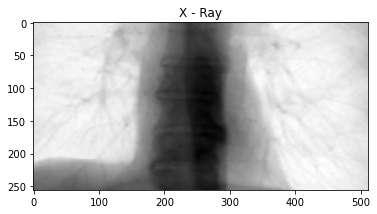

In [68]:
xray = I[0, :, :]
for i in range(1, rows):
    xray += I[i, :, :]

    plt.figure("X - Ray")
plt.title("X - Ray")
plt.imshow(np.rot90(xray), cmap="gray")

# 4. Now simulate the planar X-ray image that would be obtained by projection along x and y:

<strong>a. Quadrupling the current intensity at the same time as using half the X-ray tube voltage: what changed? (hint: look at the histograms!) </strong><br>

$$ I \propto (kV_p)^2 (mA) $$
$$ \implies I = C \times(kV_p)^2 (mA) $$
When the current intensity $ ( mA ) $ is quadrupled and the X-ray tube voltage  $ (kV_p) $ is halved, we get the following equation for the new intensity $ I' $,

$$ I' = C \times {\left(\frac{kV_p}{2}\right)}^2 \times 4 (mA) $$

$$ \implies I' = C \times(kV_p)^2 (mA) = I $$

*Hence the histogram plots are the same*

<strong>b. What would happen to the image if the X-ray energy was significantly increased? Discuss this, explaining why $ µ_{bone} $ >> $ µ_{tissue} $ at low X-ray energies, while the two values of µ become closer as the X-ray energy increases. </strong><br>

When the X-ray energy is significantly increased, more Compton scattering will occur. Due to this, the electrons loses energy as it gets deflected from its original path and thereby producing noise and artefacts in the X-ray image. Moreover, the contrast of the X-ray image will also be poor.

### $$ \mu = \rho N_g \left ( f(E) + C_p \frac{Z^m}{E^n} \right ) $$

At low X-ray energies, the photoelectric effect is more dominant and the $ \mu $ value depends on the effective atomic number. Since bones are mostly made of Calcium, they have a greater **effective atomic number** when compared to tissues. This means $ µ_{bone} $ >> $ µ_{tissue} $.

At high X-ray energy, the compton scattering is more dominant and the $ \mu $ depends on the $ \rho N_g $ factor i.e. the density of the absorbent and the electron density respectively. Since $ \rho N_g $ factor for both tissue and bone is almost the same during compton effect, the $ \mu_{bone} becomes closer to \mu_{tissue}.